In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
df=pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [115]:
df.shape

(10866, 21)

In [116]:
#check unique values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Homepage is useless in this analysis, so I decide to drop this column.
Because "Release_year" is also in the dataset, release_date is not important at all.
Keywords, tagline, and overview are related to the story, I don't think it is necessary to have these.
Base on above description, I decide to drop 5 columns.

In [117]:
df.drop(['homepage','release_date','keywords','tagline','overview'],axis=1, inplace=True)
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


In [118]:
#check null column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There are 10866 datas in the data base, if I drop 1030 lines, I still have over night thousand datas. So I decide to drop the null columns.

In [119]:
df.dropna(inplace=True)

In [120]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [121]:
df.shape

(9771, 16)

In [122]:
# Check if any duplicate column
df.duplicated().sum()

1

In [123]:
df.drop_duplicates(inplace=True)

In [124]:
df.duplicated().sum()

0

Handle multiple values.

In [125]:
df_new= df[df['cast'].str.contains('|')]

In [126]:
df_new.shape

(9770, 16)

In [127]:
#cleaning data with spilt
split_columns=['cast','genres','production_companies']

for c in split_columns:
    df_new[c]=df_new[c].apply(lambda x:x.split("|")[0])

Check cast, genres and production_companies only left the first value.

In [128]:
df_new.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,2947,7.3,2015,1.747999e+08,1.385749e+09


Q1: What is the distribution of genres?

In [129]:
genre_ind= df_new.genres.value_counts()
genre_ind.head()

Drama        2223
Comedy       2084
Action       1478
Horror        853
Adventure     550
Name: genres, dtype: int64

In [130]:
genre_total=df_new.genres.value_counts().sum()
genre_total

9770

In [131]:
genre_prop = genre_ind/genre_total
genre_prop.head()

Drama        0.227533
Comedy       0.213306
Action       0.151279
Horror       0.087308
Adventure    0.056295
Name: genres, dtype: float64

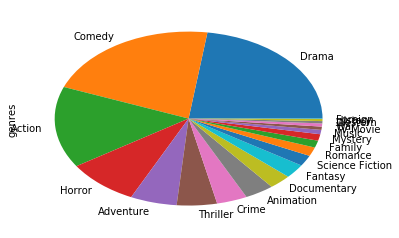

In [132]:
genre_prop.plot(kind='pie');

Base on pie chart, Drama, Comedy, and Action have most propotion in Genres.
And these three genres are in the majority of over half of the genres.

Q2:Is there any relationship between runtime and revenue?

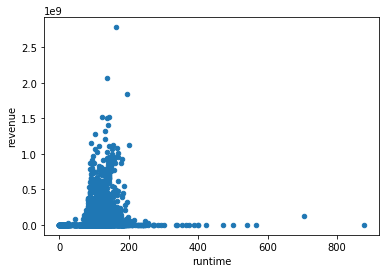

In [133]:
df.plot(x='runtime', y='revenue',kind='scatter');

There is neithor postive nor negative relationship between runtime and revenue.
In other words, longer movie will not get more revene, maybe story is what important.
Therefore, next I want to know whether my assupmtion is true.

Q3: Is there any relationship between genres and revenue?

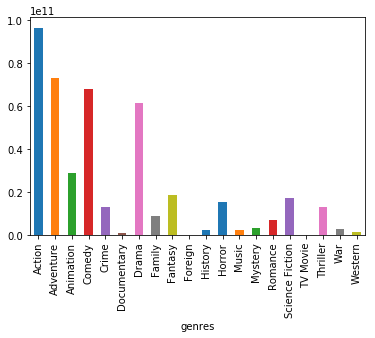

In [138]:
ge_re = df_new.groupby('genres').sum().revenue
ge_re.plot(kind='bar');

Through the chart with Q1 and Q3, though Action is the third most genre, it creates the most revenues.
People loves Action and Adventure movie most. This can be an advise for whom wants to produce a movie.

In [2]:
import numpy as np
a = np.array([[2,1,2],[3,9,2]])
a += 5
a

array([[ 7,  6,  7],
       [ 8, 14,  7]])

In [15]:
for i in [0,2,3]:
    if i% 2 ==0:
        print "even"
    elif i == 0:
        print "zero"
    else:
        print "odd"

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("even")? (<ipython-input-15-c99ccc1215e0>, line 3)

In [19]:
x=53
for i in x:
    print(i)
    

TypeError: 'int' object is not iterable